In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from collections import Counter
import joblib
import h5py
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/My Drive/nutrition_recom/')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/nutrition_recom.csv')

In [ ]:
dataset

,id,calories,proteins,fat,carbohydrate,name,image
0,1,280.0,9.20,28.40,0.00,Abon,https://img-cdn.medkomtek.com/PbrY9X3ignQ8sVuj...
1,2,513.0,23.70,37.00,21.30,Abon haruwan,https://img-global.cpcdn.com/recipes/cbf330fbd...
2,3,0.0,0.00,0.20,0.00,Agar-agar,https://res.cloudinary.com/dk0z4ums3/image/upl...
3,4,45.0,1.10,0.40,10.80,Akar tonjong segar,https://images.tokopedia.net/img/cache/200-squ...
4,5,37.0,4.40,0.50,3.80,Aletoge segar,https://nilaigizi.com/assets/images/produk/pro...
...,...,...,...,...,...,...,...
942,965,50.0,1.10,0.20,16.00,Cherry,https://cdn.mos.cms.futurecdn.net/boY5fhCtzrKa...
943,966,70.0,0.94,4.53,6.35,Cireng,https://asset-2.tstatic.net/medan/foto/bank/im...
944,967,452.0,20.11,15.81,55.58,Kerak_telor,https://lingkar.news/wp-content/uploads/2023/0...
945,968,150.0,2.99,0.27,32.96,Nasi_kuning,https://storage.googleapis.com/mealy-bucket/re...


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            947 non-null    int64  
 1   calories      947 non-null    float64
 2   proteins      947 non-null    float64
 3   fat           947 non-null    float64
 4   carbohydrate  947 non-null    float64
 5   name          947 non-null    object 
 6   image         947 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 51.9+ KB


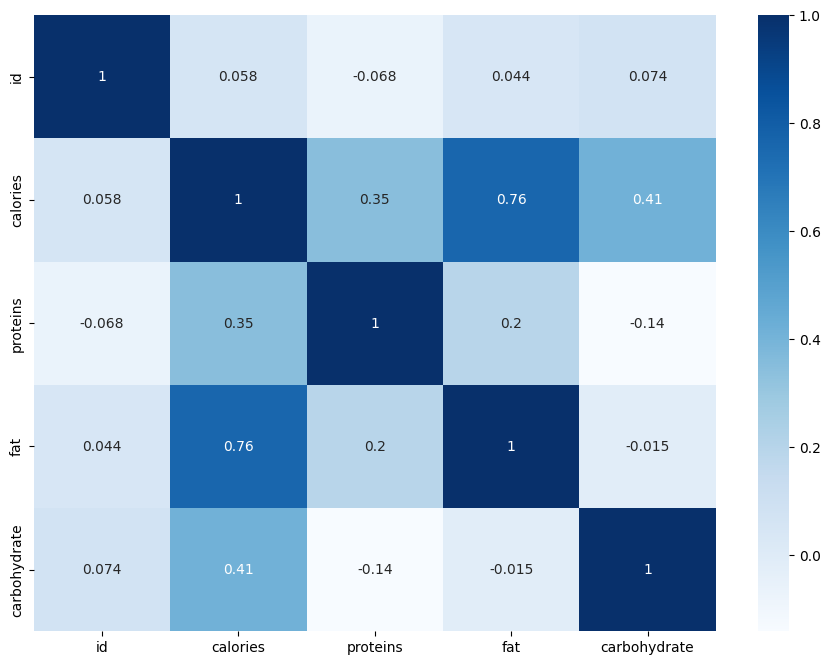

In [ ]:
numeric_dataset = dataset.select_dtypes(include=[float, int])

correlation_matrix = numeric_dataset.corr()

fig, ax = plt.subplots(figsize=(11, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", ax=ax)
plt.show()

<Axes: xlabel='proteins', ylabel='fat'>

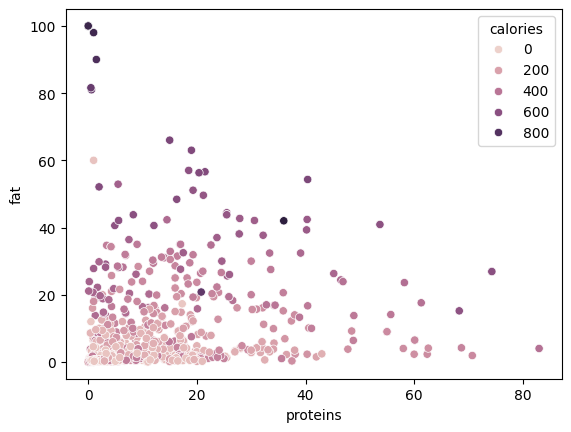

In [ ]:
sns.scatterplot(x='proteins' , y = 'fat', data=dataset, hue='calories')

In [ ]:
dataset_cleaned = dataset.dropna()

X_numeric = dataset_cleaned[['calories', 'proteins', 'fat', 'carbohydrate']]

wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_numeric)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

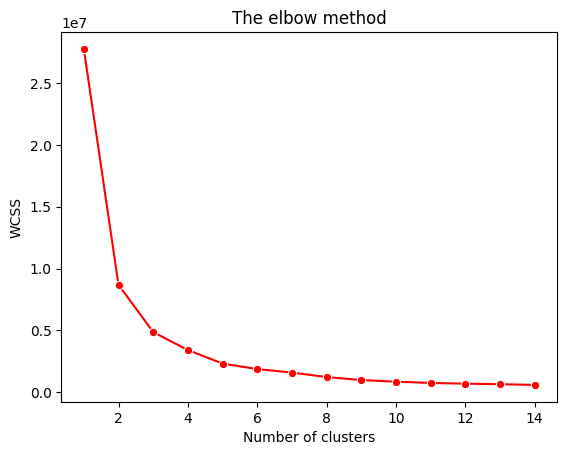

In [ ]:
df = pd.DataFrame({'Clusters': range(1, 15), 'WCSS': wcss})
sns.lineplot(x='Clusters', y='WCSS', data=df, marker='o', color='red')

plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
optimal_num_clusters = 5
kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_numeric)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
joblib_file = '/content/drive/My Drive/kmeans_model.joblib'
joblib.dump(kmeans, joblib_file)

['/content/drive/My Drive/kmeans_model.joblib']

In [ ]:
silhouette_avg = silhouette_score(X_numeric, y_kmeans)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5403823005716928


In [ ]:
from collections import Counter
print(Counter(y_kmeans))

Counter({1: 365, 3: 253, 0: 240, 4: 76, 2: 13})


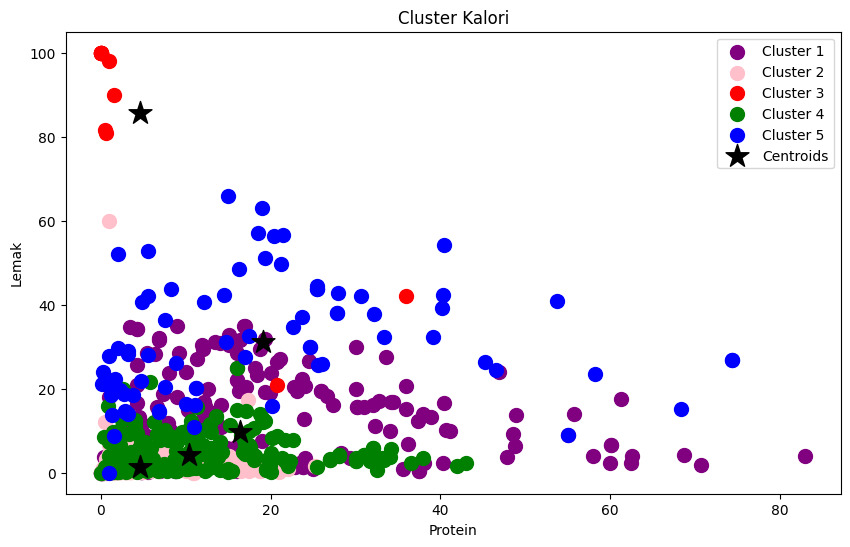

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_numeric.iloc[y_kmeans == 0, 1], X_numeric.iloc[y_kmeans == 0, 2], s=100, c='purple', label='Cluster 1')
plt.scatter(X_numeric.iloc[y_kmeans == 1, 1], X_numeric.iloc[y_kmeans == 1, 2], s=100, c='pink', label='Cluster 2')
plt.scatter(X_numeric.iloc[y_kmeans == 2, 1], X_numeric.iloc[y_kmeans == 2, 2], s=100, c='red', label='Cluster 3')
plt.scatter(X_numeric.iloc[y_kmeans == 3, 1], X_numeric.iloc[y_kmeans == 3, 2], s=100, c='green', label='Cluster 4')
plt.scatter(X_numeric.iloc[y_kmeans == 4, 1], X_numeric.iloc[y_kmeans == 4, 2], s=100, c='blue', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='black', label='Centroids', marker='*')

plt.title('Cluster Kalori')
plt.xlabel('Protein')
plt.ylabel('Lemak')
plt.legend()
plt.show()

Distribusi Data:

Data tersebar pada sumbu Protein (x-axis) dan Lemak (y-axis).
1. Kluster 4 (Hijau) tampaknya memiliki data dengan kadar protein rendah dan lemak rendah.
2. Kluster 5 (Biru) memiliki data yang tersebar di berbagai kadar protein dan kadar lemak menengah.
3. Kluster 3 (Merah) memiliki beberapa titik data dengan kadar lemak sangat tinggi.
4. Kluster 2 (Merah Muda) memiliki data dengan variasi kadar protein dan lemak yang lebih luas.
5. Kluster 1 (Ungu) memiliki sedikit data dengan kadar lemak rendah dan protein menengah.

In [ ]:
cluster_1_data = dataset_cleaned[y_kmeans == 0]
cluster_1_nama = cluster_1_data["name"]

print("10 Nama makanan acak dalam Cluster 1:")
cluster_1_nama_list = cluster_1_nama.str.strip("[]").values
random_10_nama = random.sample(list(cluster_1_nama_list), 10)
output_cluster_1 = ", ".join(random_10_nama)
print(output_cluster_1)

10 Nama makanan acak dalam Cluster 1:
tape, Dodol, Brem, Tepung Jalejo, Empal (daging) Goreng masakan, Kerupuk Melinjo mentah, Gatot, Onde-onde , Kacang Merah, Kacang tunis kering


In [ ]:
cluster_2_data = dataset_cleaned[y_kmeans == 1]
cluster_2_nama = cluster_2_data["name"]

print("10 Nama makanan acak dalam Cluster 2:")
cluster_2_nama_list = cluster_2_nama.str.strip("[]").values
random_10_nama = random.sample(list(cluster_2_nama_list), 10)
output_cluster_2 = ", ".join(random_10_nama)
print(output_cluster_2)

10 Nama makanan acak dalam Cluster 2:
Daun Ubi Jalar kukus, Paria (Pare), Terong kukus, Kool Kembang, Sukiyaki masakan, Rebung, Bayam tumis + oncom, Kapri Muda, Rajungan segar, Coto mangkasara kuda masakan


In [ ]:
cluster_3_data = dataset_cleaned[y_kmeans == 2]
cluster_3_nama = cluster_3_data["name"]

print("10 Nama makanan acak dalam Cluster 3:")
cluster_3_nama_list = cluster_3_nama.str.strip("[]").values
random_10_nama = random.sample(list(cluster_3_nama_list), 10)
output_cluster_3 = ", ".join(random_10_nama)
print(output_cluster_3)

10 Nama makanan acak dalam Cluster 3:
Minyak kedelai, Minyak Hati Hiu (Eulamia), Minyak Kelapa, Opak Singkong , Minyak Kacang Tanah, Minyak Kelapa Sawit, Minyak Ikan, Minyak Wijen, Kacang Telur , Mentega


In [ ]:
cluster_4_data = dataset_cleaned[y_kmeans == 3]
cluster_4_nama = cluster_4_data["name"]

print("10 Nama makanan acak dalam Cluster 4:")
cluster_4_nama_list = cluster_4_nama.str.strip("[]").values
random_10_nama = random.sample(list(cluster_4_nama_list), 10)
output_cluster_4 = ", ".join(random_10_nama)
print(output_cluster_4)

10 Nama makanan acak dalam Cluster 4:
Terasi, Ikan Belida bakar, Kentang Hitam, Jagung muda rebus, Usus Sapi, Jagung Sayur (tumis) , Tapai ketan hitam, Oncom, Beras Ketan Putih kukus, Pempek tenggiri


In [ ]:
cluster_5_data = dataset_cleaned[y_kmeans == 4]
cluster_5_nama = cluster_5_data["name"]

print("Nama makanan acak dalam Cluster 5:")
cluster_5_nama_list = cluster_5_nama.str.strip("[]").values
random_10_nama = random.sample(list(cluster_5_nama_list), 10)
output_cluster_5 = ", ".join(random_10_nama)
print(output_cluster_5)

Nama makanan acak dalam Cluster 5:
Keripik lampung, Kerupuk Melinjo goreng manis, Kenari, Kacang sukro, Kelapa hutan kering, Keripik singkong, Abon haruwan, Kerupuk cumi goreng, Ikan Asin gabus goreng, Keripik ubi


In [ ]:
rules = {
    "rendah-protein-rendah-lemak": output_cluster_1,
    "rendah-protein-tinggi-lemak": output_cluster_3,
    "tinggi-protein-rendah-lemak": output_cluster_4,
    "tinggi-protein-tinggi-lemak": output_cluster_5,
}

In [ ]:
print("Selamat Datang di Sistem Penyaranan Makanan Sehat!")
print("Sistem ini berusaha untuk merekomendasikan makanan sehat bagi Anda berdasarkan hasil BMI.")

berat_badan = float(input("Berapa berat badan Anda dalam kg? "))
tinggi_badan = float(input("Berapa tinggi badan Anda dalam cm? "))
pantangan = input("Apa bahan makanan yang merupakan pantangan bagi Anda (pisahkan dengan koma)? ")
pantangan_list = [item.strip() for item in pantangan.split(",")]

Selamat Datang di Sistem Penyaranan Makanan Sehat!
Sistem ini berusaha untuk merekomendasikan makanan sehat bagi Anda berdasarkan hasil BMI.
Berapa berat badan Anda dalam kg? 56
Berapa tinggi badan Anda dalam cm? 178
Apa bahan makanan yang merupakan pantangan bagi Anda (pisahkan dengan koma)? ayam, ikan


In [ ]:
tinggi = tinggi_badan / 100
tinggi = round(tinggi, 2)

bmi = berat_badan / (tinggi ** 2)
bmi = round(bmi, 2)

print("BMI Anda adalah:", bmi)

BMI Anda adalah: 17.67


In [ ]:
rekomendasi = []

if bmi < 18.5:
    rekomendasi.append("rendah-protein-tinggi-lemak")
    rekomendasi.append("tinggi-protein-tinggi-lemak")
if bmi >= 18.5 and bmi <= 24.9:
    rekomendasi.append("rendah-protein-rendah-lemak")
    rekomendasi.append("rendah-protein-tinggi-lemak")
    rekomendasi.append("tinggi-protein-rendah-lemak")
if bmi > 24.9:
    rekomendasi.append("tinggi-protein-rendah-lemak")

pantangan_list = [item.strip().lower() for item in pantangan.split(",")]
for item in pantangan_list:
    if item in rekomendasi:
        rekomendasi.remove(item)

In [ ]:
if len(rekomendasi) == 0:
    print("Maaf, tidak ada rekomendasi makanan yang sesuai dengan BMI, opsi makanan kesukaan, dan pantangan bahan makanan Anda.")
else:
    print("Sesuai hasil BMI, Anda disarankan untuk memilih makanan berikut: ")
    for r in rekomendasi:
      print("- " + rules[r])

Sesuai hasil BMI, Anda disarankan untuk memilih makanan berikut: 
- Minyak kedelai, Minyak Hati Hiu (Eulamia), Minyak Kelapa, Opak Singkong , Minyak Kacang Tanah, Minyak Kelapa Sawit, Minyak Ikan, Minyak Wijen, Kacang Telur , Mentega
- Keripik lampung, Kerupuk Melinjo goreng manis, Kenari, Kacang sukro, Kelapa hutan kering, Keripik singkong, Abon haruwan, Kerupuk cumi goreng, Ikan Asin gabus goreng, Keripik ubi


In [ ]:
joblib.dump(kmeans, '/content/drive/My Drive/kmeans_model.h5')

['/content/drive/My Drive/kmeans_model.h5']